In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2lab,lab2rgb
import shutil
import os
from skimage.io import imread,imshow

In [2]:
TRAIN_ROOT_DIR=r'D:\Downloads\dldataset\dataset\dataset_updated\training_set'
DEST= r'D:\Downloads\train\images'

In [3]:
if not os.path.exists(DEST):
    os.makedirs(DEST)
    
    for dir in os.listdir(TRAIN_ROOT_DIR):
        for img in os.listdir(os.path.join(TRAIN_ROOT_DIR,dir)):
            ORG=os.path.join(TRAIN_ROOT_DIR,dir,img)
            try: 
                imread(ORG)
                shutil.copy(ORG,DEST)
            except:
                print(f"the image at {ORG} cannot be used")
            
        

In [4]:
len(os.listdir(r"D:\Downloads\train\images"))

4746

In [5]:
from keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1/255,
    featurewise_center=True,
    rotation_range=40,
    horizontal_flip=True,
    vertical_flip=True
)

In [7]:
train=train_datagen.flow_from_directory(r"D:\Downloads\train",target_size=(256,256),batch_size=2000,shuffle=True)

Found 4746 images belonging to 1 classes.


In [8]:
t_img,label=train.next()

C:\Users\admin\anaconda3\lib\site-packages\keras\preprocessing\image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [9]:
def plotImage(img_arr,label):
    plt.figure(figsize=(5,5))
    for im,l in zip(img_arr,label):
        plt.imshow(im)
        plt.title(im.shape)
        plt.axis('off')
        plt.show()
    
    
    

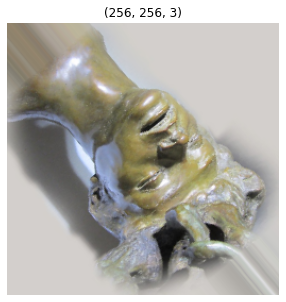

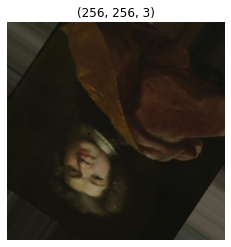

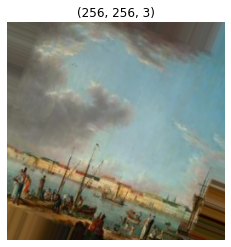

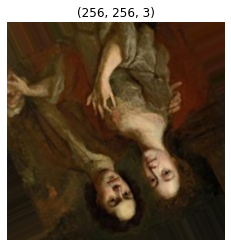

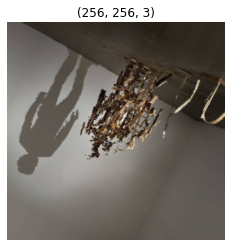

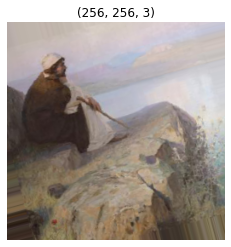

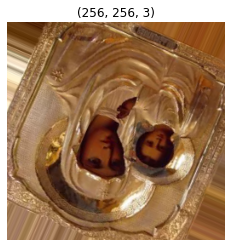

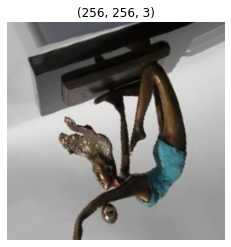

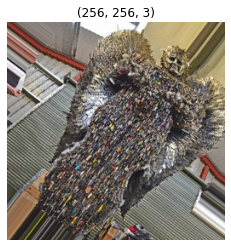

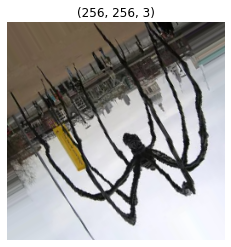

In [10]:
plotImage(t_img[:10],label[:10])

In [11]:
X=[]
y=[]

In [12]:
for img in t_img:
    try:
        lab=rgb2lab(img)
        X.append(lab[:,:,0])
        y.append(lab[:,:,1:]/128)
    except:
        print('error')

In [13]:
X_train=np.array(X)
X_train=np.expand_dims(X_train,axis=len(X_train.shape))
y_train=np.array(y)
X_train.shape,y_train.shape

((2000, 256, 256, 1), (2000, 256, 256, 2))

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.layers import Conv2D, MaxPool2D, UpSampling2D, Input, LeakyReLU
from tensorflow.keras.models import Sequential


In [15]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',padding='same',strides=2,input_shape=(256,256,1)))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',padding='same',strides=2))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same',strides=2))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',padding='same'))


model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(Conv2D(16,(3,3),activation='relu',padding='same'))
model.add(Conv2D(2,(3,3),activation=LeakyReLU(alpha=0.01),padding='same'))
model.add(UpSampling2D((2,2)))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       147584    
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 256)       295168    
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 512)       1180160   
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 512)       2

In [16]:
model.compile(optimizer='adam',metrics=['acc'],loss='mse')

In [17]:
his=model.fit(X_train,y_train,epochs=5,batch_size=64,steps_per_epoch=X_train.shape[0]//64,verbose=1)

Epoch 1/5
31/31 [==============================] - 1038s 34s/step - loss: 0.0152 - acc: 0.4008
Epoch 2/5
31/31 [==============================] - 1133s 37s/step - loss: 0.0133 - acc: 0.7819
Epoch 3/5
31/31 [==============================] - 1026s 33s/step - loss: 0.0109 - acc: 0.7437
Epoch 4/5
31/31 [==============================] - 3342s 110s/step - loss: 0.0103 - acc: 0.7823
Epoch 5/5
31/31 [==============================] - 582s 19s/step - loss: 0.0102 - acc: 0.7848


In [18]:
model.save("./bestmodel.h5")

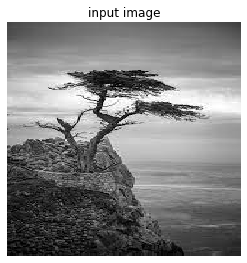

In [22]:
img1_color=[]
path="D:\Downloads\i3.jpg"
img=img_to_array(
                 load_img(path,target_size=(256,256,3)))/255
plt.title("input image")
imshow(img)
plt.axis("off")
plt.show()

In [23]:
img1_color.append(img)
img1_color=rgb2lab(img1_color)[:,:,:,0]
img1_color=img1_color.reshape(img1_color.shape+(1,))

In [24]:
o1=model.predict(img1_color)
o1=o1*128

1/1 [==============================] - 1s 528ms/step


In [25]:
result=np.zeros((256,256,3))
result[:,:,0]=img1_color[0][:,:,0]
result[:,:,1:]=o1[0]

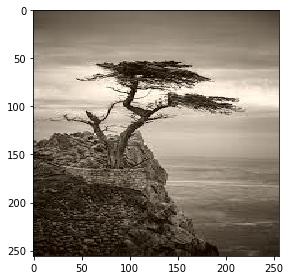

In [26]:
imshow(lab2rgb(result))

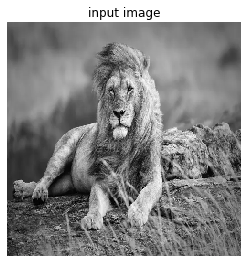

1/1 [==============================] - 0s 101ms/step


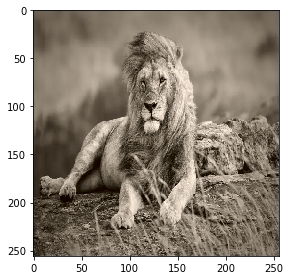

In [27]:
img1_color=[]
path="D:\Downloads\i4.webp"
img=img_to_array(
                 load_img(path,target_size=(256,256,3)))/255
plt.title("input image")
imshow(img)
plt.axis("off")
plt.show()
img1_color.append(img)
img1_color=rgb2lab(img1_color)[:,:,:,0]
img1_color=img1_color.reshape(img1_color.shape+(1,))
o1=model.predict(img1_color)
o1=o1*128
result=np.zeros((256,256,3))
result[:,:,0]=img1_color[0][:,:,0]
result[:,:,1:]=o1[0]
imshow(lab2rgb(result))

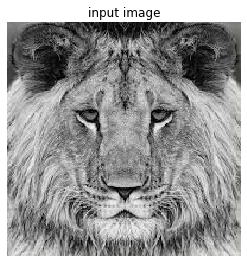

1/1 [==============================] - 0s 91ms/step


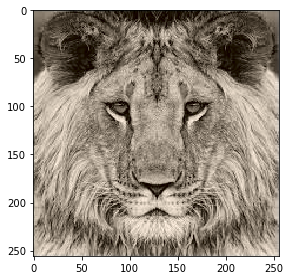

In [28]:
img1_color=[]
path="D:\Downloads\i5.jpg"
img=img_to_array(
                 load_img(path,target_size=(256,256,3)))/255
plt.title("input image")
imshow(img)
plt.axis("off")
plt.show()
img1_color.append(img)
img1_color=rgb2lab(img1_color)[:,:,:,0]
img1_color=img1_color.reshape(img1_color.shape+(1,))
o1=model.predict(img1_color)
o1=o1*128
result=np.zeros((256,256,3))
result[:,:,0]=img1_color[0][:,:,0]
result[:,:,1:]=o1[0]
imshow(lab2rgb(result))

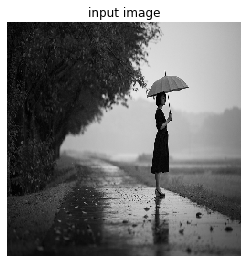

1/1 [==============================] - 0s 103ms/step


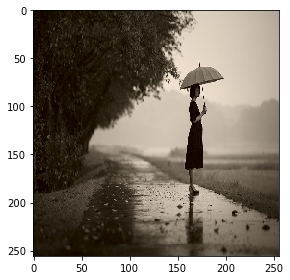

In [29]:
img1_color=[]
path="D:\Downloads\i6.jpg"
img=img_to_array(
                 load_img(path,target_size=(256,256,3)))/255
plt.title("input image")
imshow(img)
plt.axis("off")
plt.show()
img1_color.append(img)
img1_color=rgb2lab(img1_color)[:,:,:,0]
img1_color=img1_color.reshape(img1_color.shape+(1,))
o1=model.predict(img1_color)
o1=o1*128
result=np.zeros((256,256,3))
result[:,:,0]=img1_color[0][:,:,0]
result[:,:,1:]=o1[0]
imshow(lab2rgb(result))

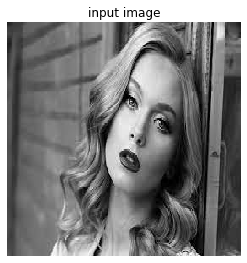

1/1 [==============================] - 0s 106ms/step


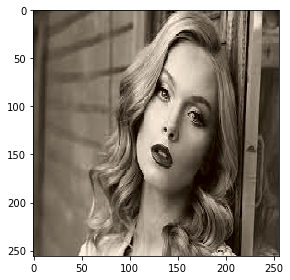

In [30]:
img1_color=[]
path="D:\Downloads\i7.jpg"
img=img_to_array(
                 load_img(path,target_size=(256,256,3)))/255
plt.title("input image")
imshow(img)
plt.axis("off")
plt.show()
img1_color.append(img)
img1_color=rgb2lab(img1_color)[:,:,:,0]
img1_color=img1_color.reshape(img1_color.shape+(1,))
o1=model.predict(img1_color)
o1=o1*128
result=np.zeros((256,256,3))
result[:,:,0]=img1_color[0][:,:,0]
result[:,:,1:]=o1[0]
imshow(lab2rgb(result))

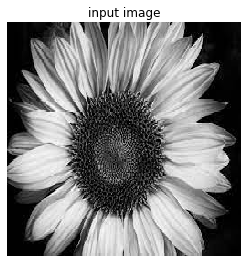

1/1 [==============================] - 0s 86ms/step


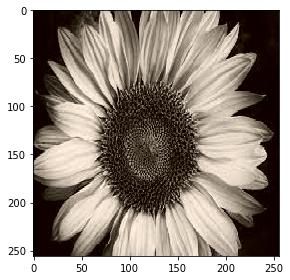

In [31]:
img1_color=[]
path="D:\Downloads\i8.jpg"
img=img_to_array(
                 load_img(path,target_size=(256,256,3)))/255
plt.title("input image")
imshow(img)
plt.axis("off")
plt.show()
img1_color.append(img)
img1_color=rgb2lab(img1_color)[:,:,:,0]
img1_color=img1_color.reshape(img1_color.shape+(1,))
o1=model.predict(img1_color)
o1=o1*128
result=np.zeros((256,256,3))
result[:,:,0]=img1_color[0][:,:,0]
result[:,:,1:]=o1[0]
imshow(lab2rgb(result))

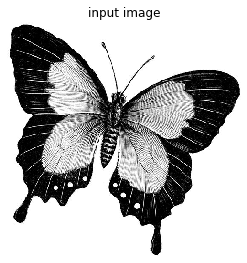

1/1 [==============================] - 0s 122ms/step


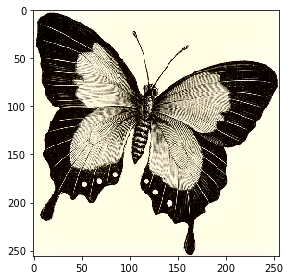

In [69]:
img1_color=[]
path="D:\Downloads\i9.jpg"
img=img_to_array(
                 load_img(path,target_size=(256,256,3)))/255
plt.title("input image")
imshow(img)
plt.axis("off")
plt.show()
img1_color.append(img)
img1_color=rgb2lab(img1_color)[:,:,:,0]
img1_color=img1_color.reshape(img1_color.shape+(1,))
o1=model.predict(img1_color)
o1=o1*128
result=np.zeros((256,256,3))
result[:,:,0]=img1_color[0][:,:,0]
result[:,:,1:]=o1[0]
imshow(lab2rgb(result))

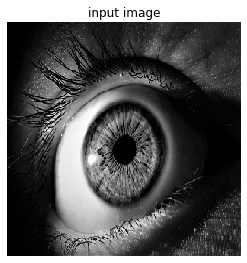

1/1 [==============================] - 0s 119ms/step


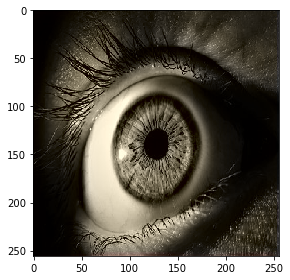

In [70]:
img1_color=[]
path="D:\Downloads\i10.jpg"
img=img_to_array(
                 load_img(path,target_size=(256,256,3)))/255
plt.title("input image")
imshow(img)
plt.axis("off")
plt.show()
img1_color.append(img)
img1_color=rgb2lab(img1_color)[:,:,:,0]
img1_color=img1_color.reshape(img1_color.shape+(1,))
o1=model.predict(img1_color)
o1=o1*128
result=np.zeros((256,256,3))
result[:,:,0]=img1_color[0][:,:,0]
result[:,:,1:]=o1[0]
imshow(lab2rgb(result))

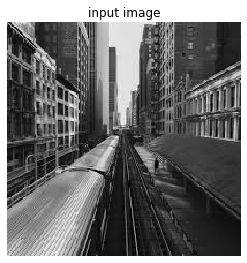

1/1 [==============================] - 0s 128ms/step


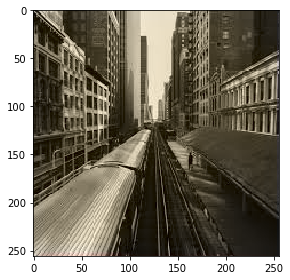

In [73]:
img1_color=[]
path="D:\Downloads\i12.jpg"
img=img_to_array(
                 load_img(path,target_size=(256,256,3)))/255
plt.title("input image")
imshow(img)
plt.axis("off")
plt.show()
img1_color.append(img)
img1_color=rgb2lab(img1_color)[:,:,:,0]
img1_color=img1_color.reshape(img1_color.shape+(1,))
o1=model.predict(img1_color)
o1=o1*128
result=np.zeros((256,256,3))
result[:,:,0]=img1_color[0][:,:,0]
result[:,:,1:]=o1[0]
imshow(lab2rgb(result))

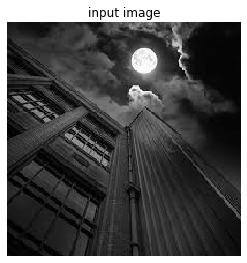

1/1 [==============================] - 0s 126ms/step


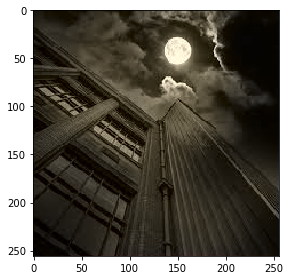

In [77]:
img1_color=[]
path="D:\Downloads\i13.jpg"
img=img_to_array(
                 load_img(path,target_size=(256,256,3)))/255
plt.title("input image")
imshow(img)
plt.axis("off")
plt.show()
img1_color.append(img)
img1_color=rgb2lab(img1_color)[:,:,:,0]
img1_color=img1_color.reshape(img1_color.shape+(1,))
o1=model.predict(img1_color)
o1=o1*128
result=np.zeros((256,256,3))
result[:,:,0]=img1_color[0][:,:,0]
result[:,:,1:]=o1[0]
r=lab2rgb(result)
imshow(r)

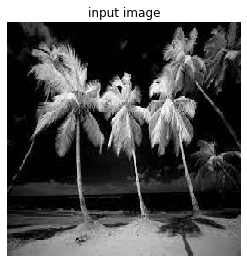

1/1 [==============================] - 0s 112ms/step


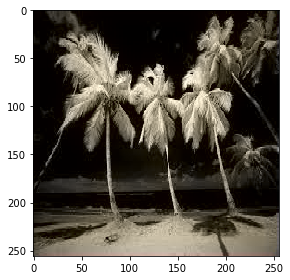

In [83]:
img1_color=[]
path="D:\Downloads\i17.jpg"
img=img_to_array(
                 load_img(path,target_size=(256,256,3)))/255
plt.title("input image")
imshow(img)
plt.axis("off")
plt.show()
img1_color.append(img)
img1_color=rgb2lab(img1_color)[:,:,:,0]
img1_color=img1_color.reshape(img1_color.shape+(1,))
o1=model.predict(img1_color)
o1=o1*128
result=np.zeros((256,256,3))
result[:,:,0]=img1_color[0][:,:,0]
result[:,:,1:]=o1[0]
r=lab2rgb(result)
imshow(r)

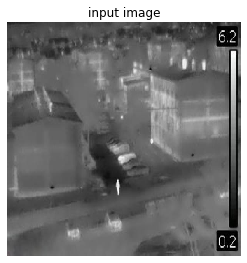

1/1 [==============================] - 0s 135ms/step


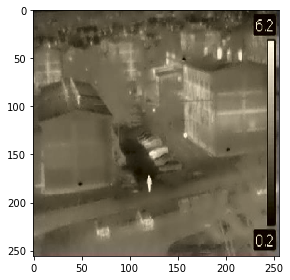

In [86]:
img1_color=[]
path="D:\Downloads\i20.jpg"
img=img_to_array(
                 load_img(path,target_size=(256,256,3)))/255
plt.title("input image")
imshow(img)
plt.axis("off")
plt.show()
img1_color.append(img)
img1_color=rgb2lab(img1_color)[:,:,:,0]
img1_color=img1_color.reshape(img1_color.shape+(1,))
o1=model.predict(img1_color)
o1=o1*128
result=np.zeros((256,256,3))
result[:,:,0]=img1_color[0][:,:,0]
result[:,:,1:]=o1[0]
r=lab2rgb(result)
imshow(r)

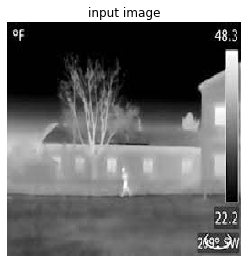

1/1 [==============================] - 0s 147ms/step


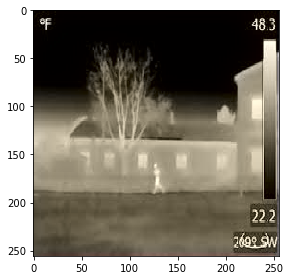

In [87]:
img1_color=[]
path="D:\Downloads\i21.jpg"
img=img_to_array(
                 load_img(path,target_size=(256,256,3)))/255
plt.title("input image")
imshow(img)
plt.axis("off")
plt.show()
img1_color.append(img)
img1_color=rgb2lab(img1_color)[:,:,:,0]
img1_color=img1_color.reshape(img1_color.shape+(1,))
o1=model.predict(img1_color)
o1=o1*128
result=np.zeros((256,256,3))
result[:,:,0]=img1_color[0][:,:,0]
result[:,:,1:]=o1[0]
r=lab2rgb(result)
imshow(r)

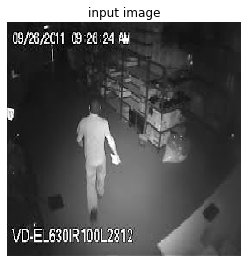

1/1 [==============================] - 0s 107ms/step


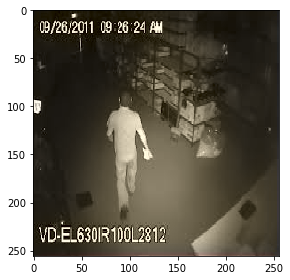

In [88]:
img1_color=[]
path="D:\Downloads\i22.jpg"
img=img_to_array(
                 load_img(path,target_size=(256,256,3)))/255
plt.title("input image")
imshow(img)
plt.axis("off")
plt.show()
img1_color.append(img)
img1_color=rgb2lab(img1_color)[:,:,:,0]
img1_color=img1_color.reshape(img1_color.shape+(1,))
o1=model.predict(img1_color)
o1=o1*128
result=np.zeros((256,256,3))
result[:,:,0]=img1_color[0][:,:,0]
result[:,:,1:]=o1[0]
r=lab2rgb(result)
imshow(r)